In [2]:
import CommonFunc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('resources/CO2Emissions_Canada.csv')

                 
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.duplicated().sum()

1103

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [6]:
df.describe(include= 'object').T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [7]:
numdata = pd.DataFrame(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                           'CO2 Emissions(g/km)']])

In [ ]:
make = df['Make']

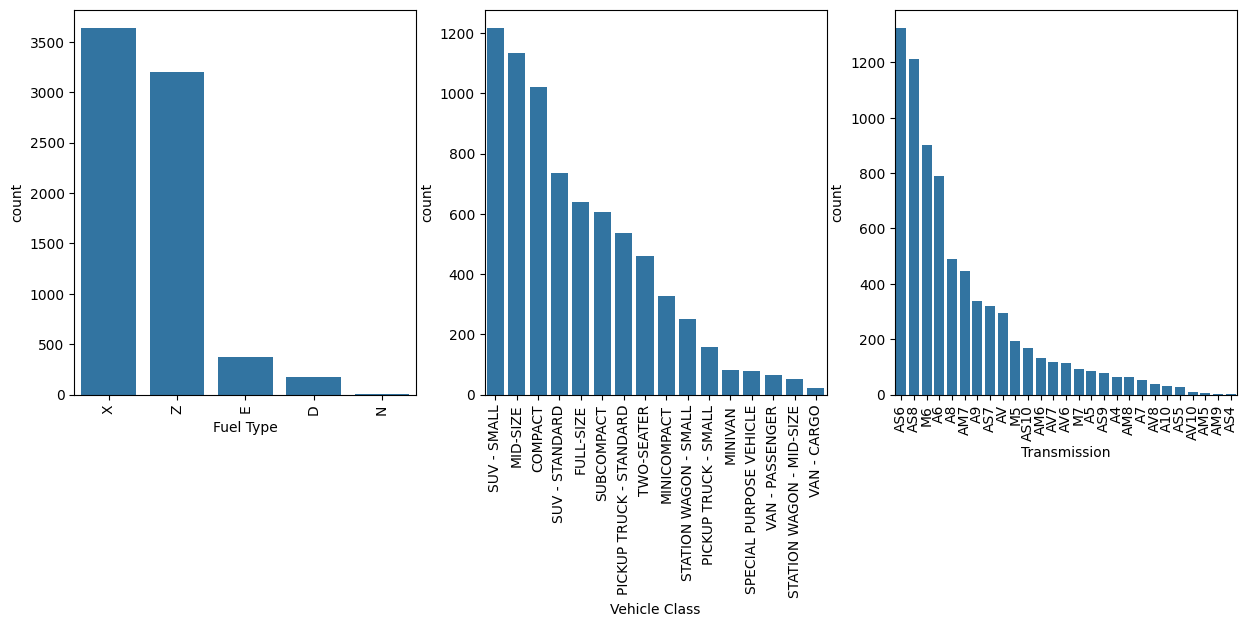

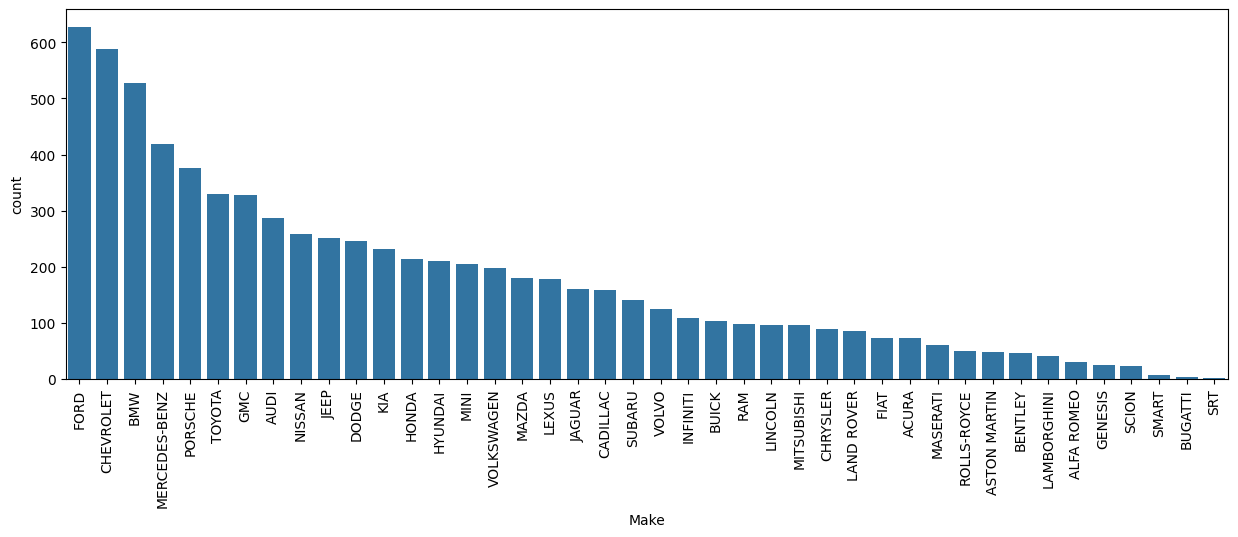

In [21]:
import numpy as np

def drawOneBarChart(axs, column):
    ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax = axs)
    ax.tick_params(axis='x', rotation=90)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

drawOneBarChart(axs[2], 'Transmission')
drawOneBarChart(axs[0], 'Fuel Type')
drawOneBarChart(axs[1], 'Vehicle Class')


fig, ax = plt.subplots()
fig.set_figwidth(15)
drawOneBarChart(ax, 'Make')



In [39]:
grouped = df.groupby('Make')['CO2 Emissions(g/km)'].agg(['mean', 'median', 'min', 'max'])

def sorting_grouped(column):
    return grouped.sort_values(by=column, ascending=False)

sorted_mean = sorting_grouped('mean')
sorted_median = sorting_grouped('median')
sorted_min = sorting_grouped('min')
sorted_max = sorting_grouped('max')


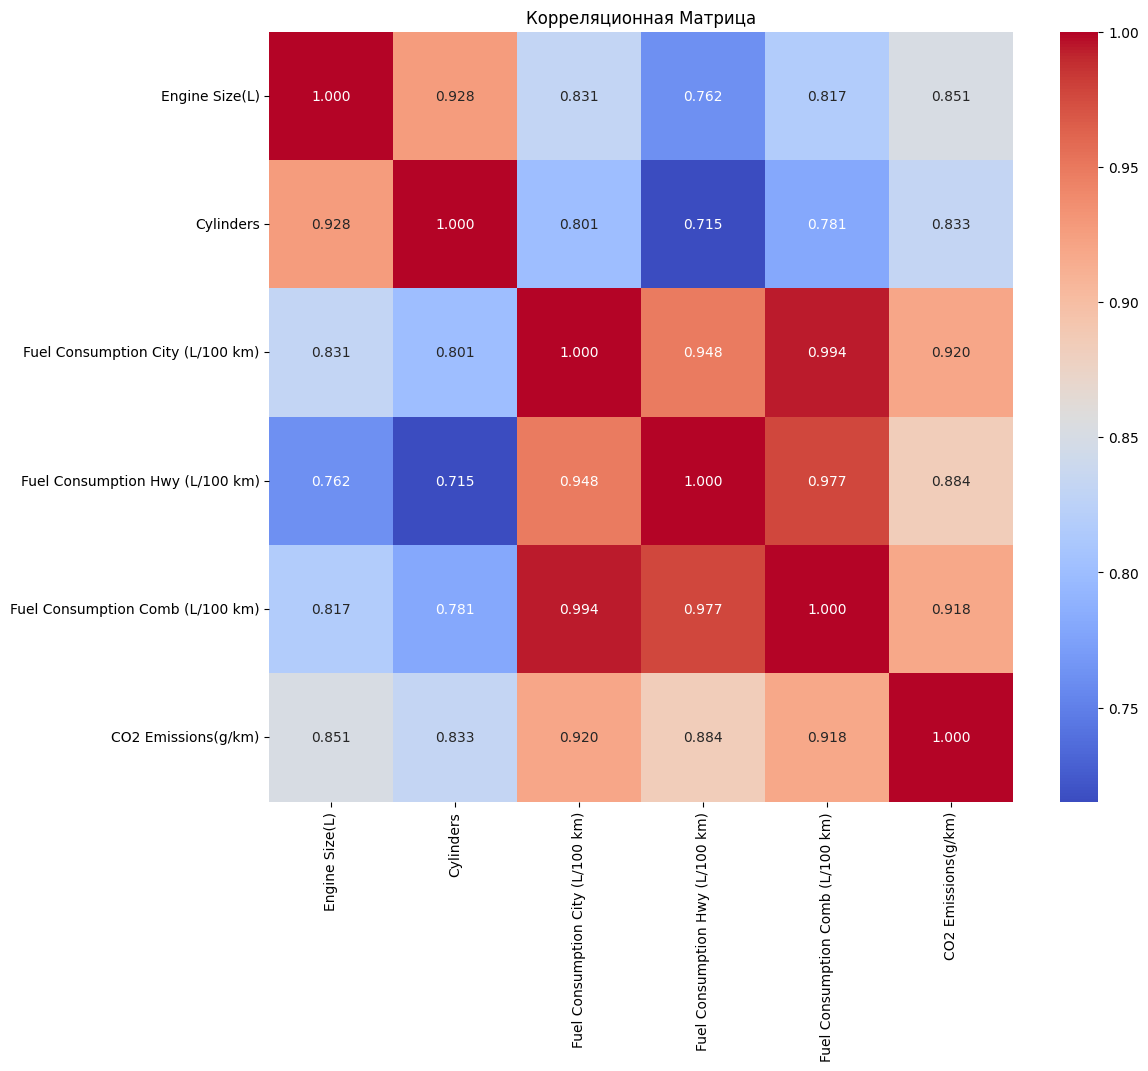

In [4]:
plt.figure(figsize=(12, 10))
correlation_matrix = numdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Корреляционная Матрица')
plt.show()


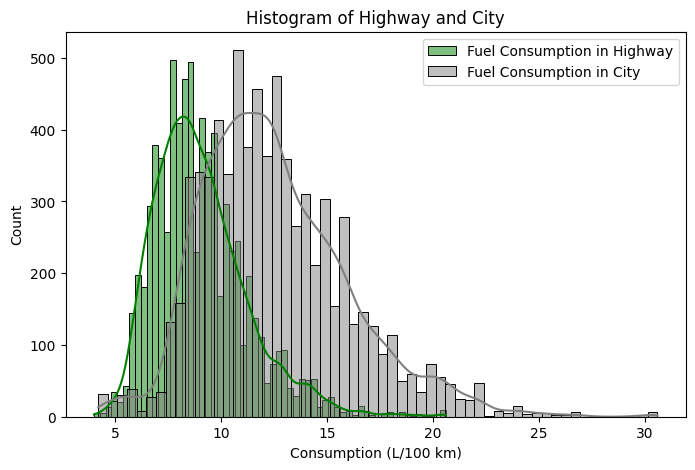

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Fuel Consumption Hwy (L/100 km)", kde=True, label = "Fuel Consumption in Highway",color = "green")
sns.histplot(data=df, x="Fuel Consumption City (L/100 km)", kde=True, label = "Fuel Consumption in City", color = "gray")
plt.xlabel('Consumption (L/100 km)')
plt.title(f'Histogram of Highway and City')
plt.legend()
plt.show()

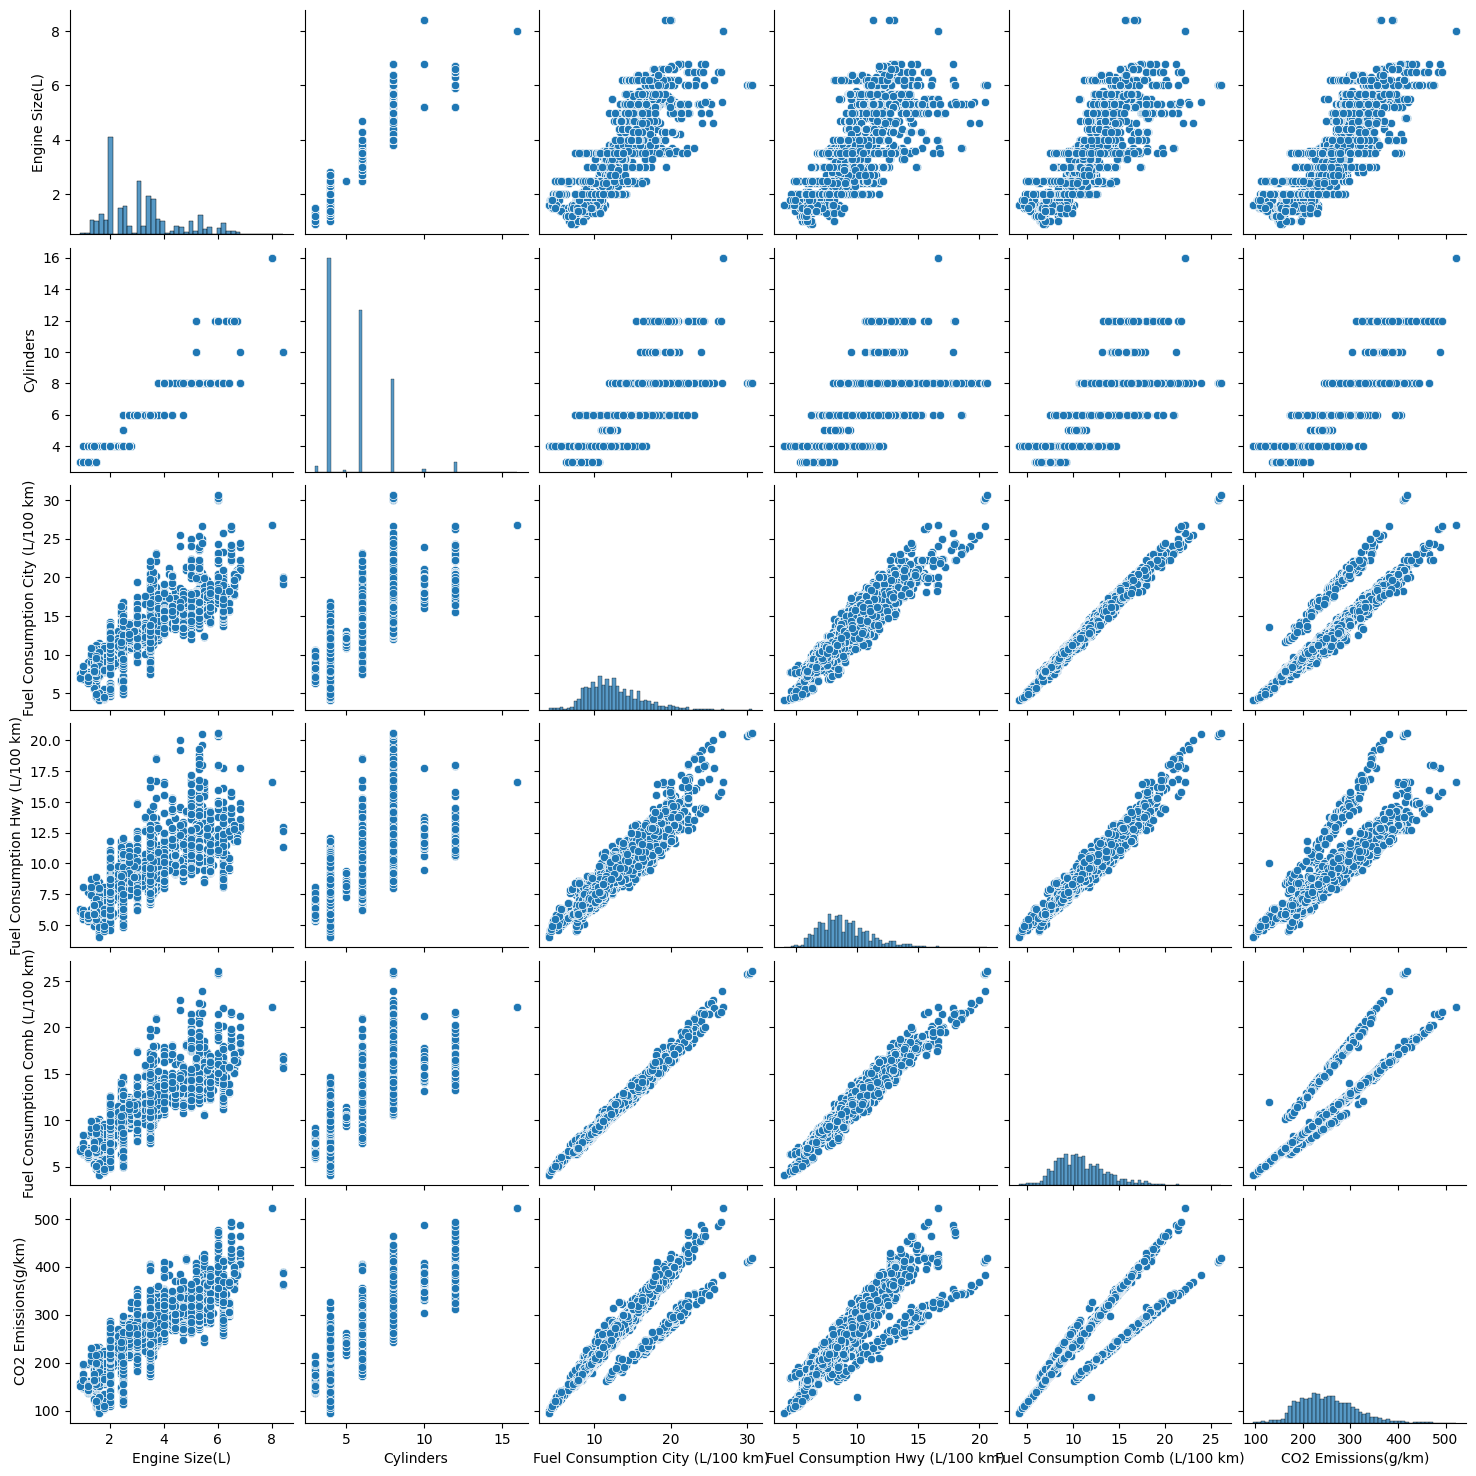

In [5]:
sns.pairplot(numdata)

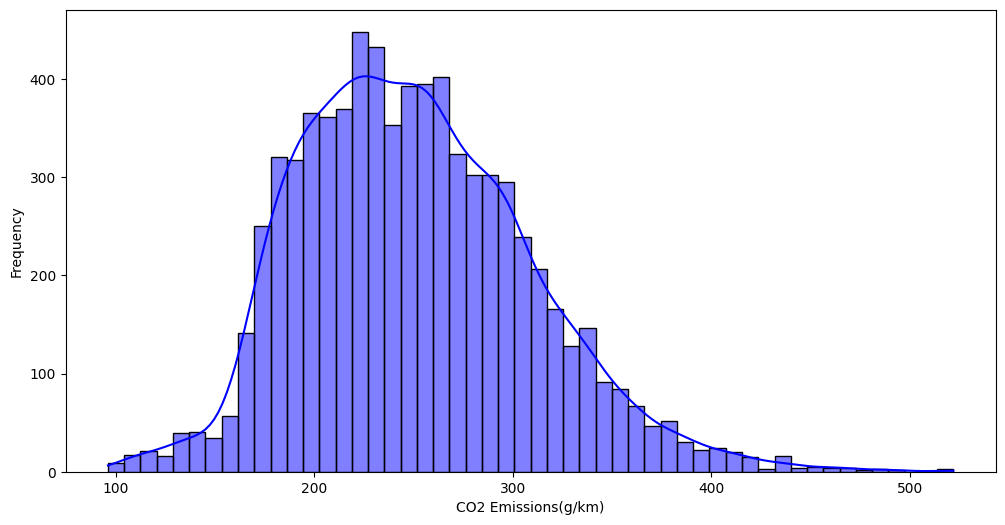

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, color='blue')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.show()

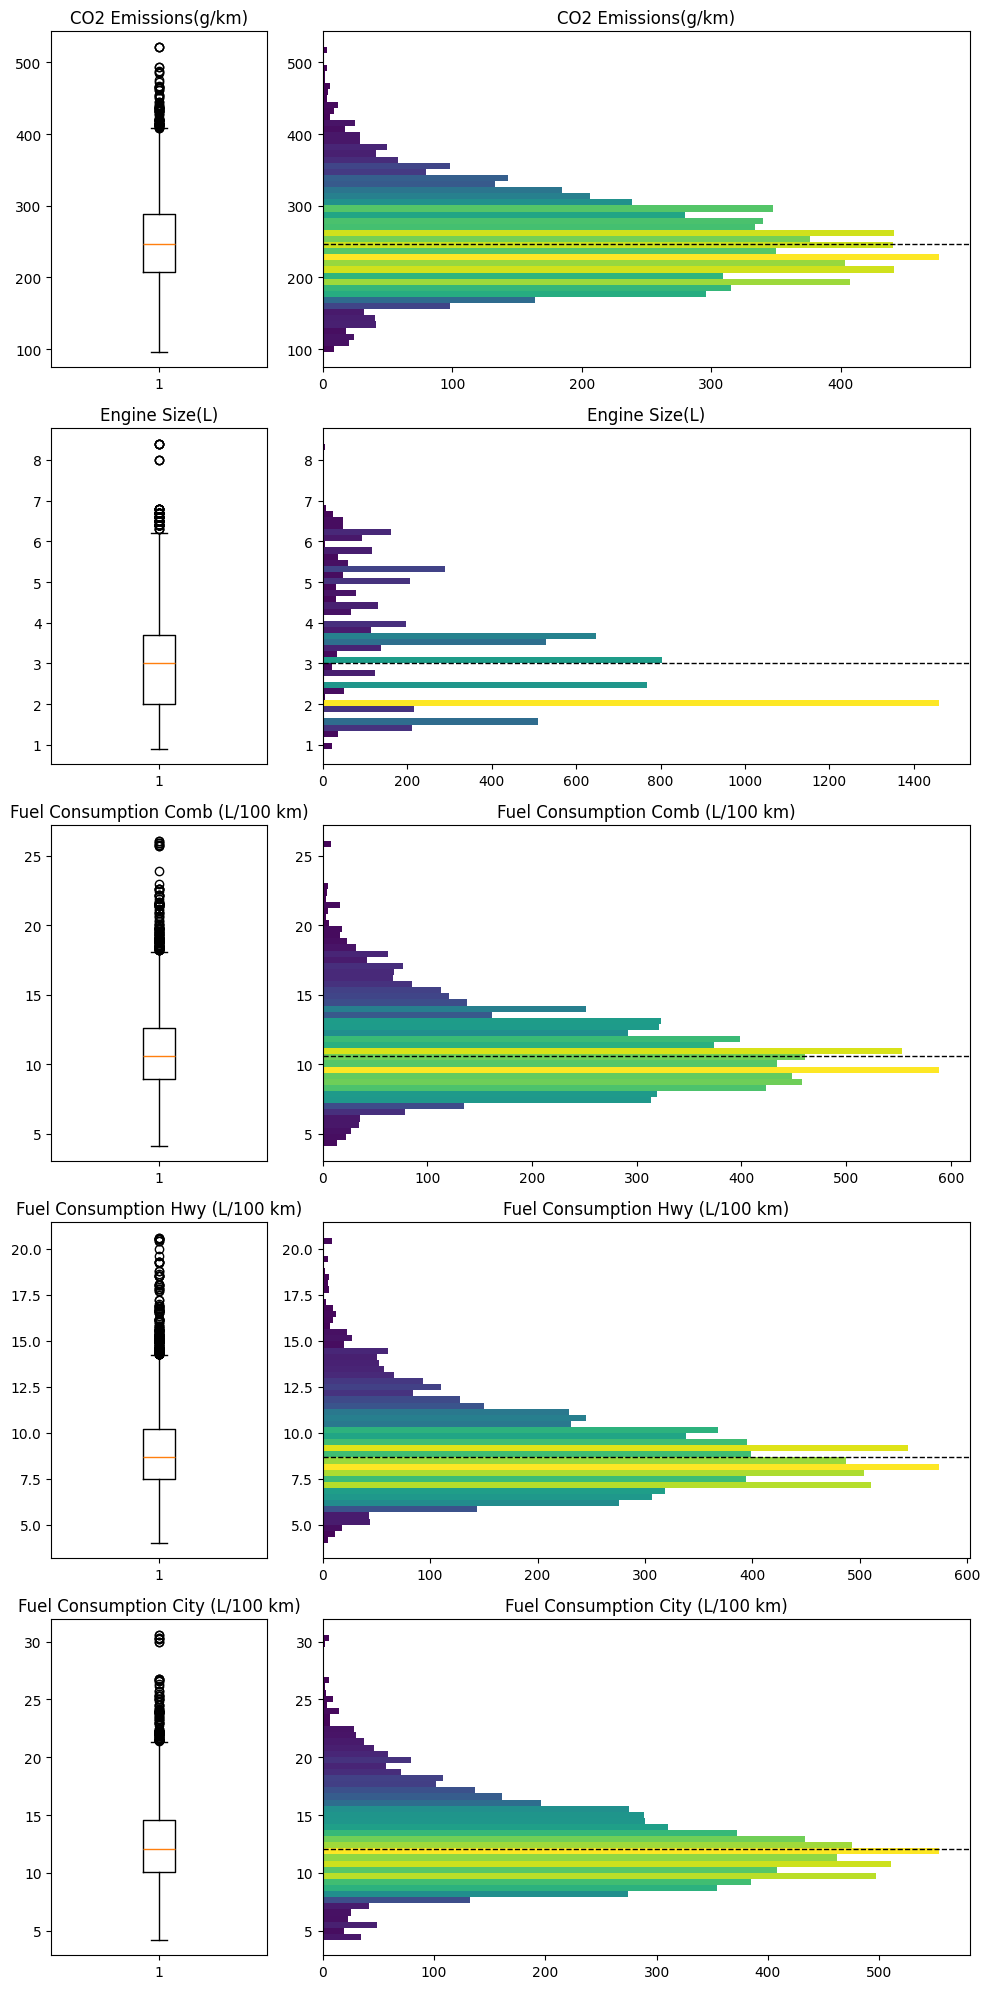

In [7]:
from matplotlib import colors
import statistics

fig, axs = plt.subplots(5, 2, width_ratios=[1, 3])
fig.set_figheight(20)
fig.set_figwidth(10)

'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'

CommonFunc.draw_must_box(axs[0,0], axs[0,1], df, 'CO2 Emissions(g/km)')
CommonFunc.draw_must_box(axs[1,0], axs[1,1], df, 'Engine Size(L)')
CommonFunc.draw_must_box(axs[2,0], axs[2,1], df, 'Fuel Consumption Comb (L/100 km)')
CommonFunc.draw_must_box(axs[3,0], axs[3,1], df, 'Fuel Consumption Hwy (L/100 km)')
CommonFunc.draw_must_box(axs[4,0], axs[4,1], df, 'Fuel Consumption City (L/100 km)')


fig.tight_layout()